In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%cd '/home/naodell/work/wbr/analysis'
np.set_printoptions(precision=3)
matplotlib.style.use('default')
params = {
          'figure.figsize': (10, 10),
          'axes.labelsize': 20,
          'axes.facecolor': 'white',
          'axes.titlesize':'x-large',
          'legend.fontsize': 20,
          'xtick.labelsize':20,
          'ytick.labelsize':20,
          'font.size':18,
          'font.sans-serif':['Arial', 'sans-serif'],
          'mathtext.sf':'Arial',
          'lines.markersize':8.,
          'lines.linewidth':2.5,
         }
matplotlib.rcParams.update(params)
%matplotlib inline
%connect_info

/home/naodell/work/wbr/analysis
{
  "shell_port": 37853,
  "iopub_port": 33823,
  "stdin_port": 55959,
  "control_port": 51561,
  "hb_port": 58723,
  "ip": "127.0.0.1",
  "key": "d21b4497-85f35c5e0a8e7a9220c43e98",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-f0889e87-5219-4103-96a5-9cab0794b293.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
# get the pulls and fit results
scenario = 'fake_factorization_tight'
param_data_asimov = pd.read_csv('data/model_parameters_asimov.csv').set_index('name')
param_data = pd.read_csv(f'data/model_parameters_{scenario}.csv').set_index('name')
param_data = param_data.query('active == 1')

# get the impacts and reduce to POI
#scenario = 'fake_factorization'
param_impacts = pd.read_csv(f'local_data/impacts_{scenario}.csv', index_col=0)
param_impacts = param_impacts[:4]

# get the labels
p_labels = param_data.index.to_list()[4:]
p_labels_up = [f'{l}_up' for l in p_labels if f'{l}_up' in param_impacts.columns]
p_labels_down = [f'{l}_down' for l in p_labels if f'{l}_down' in param_impacts.columns]


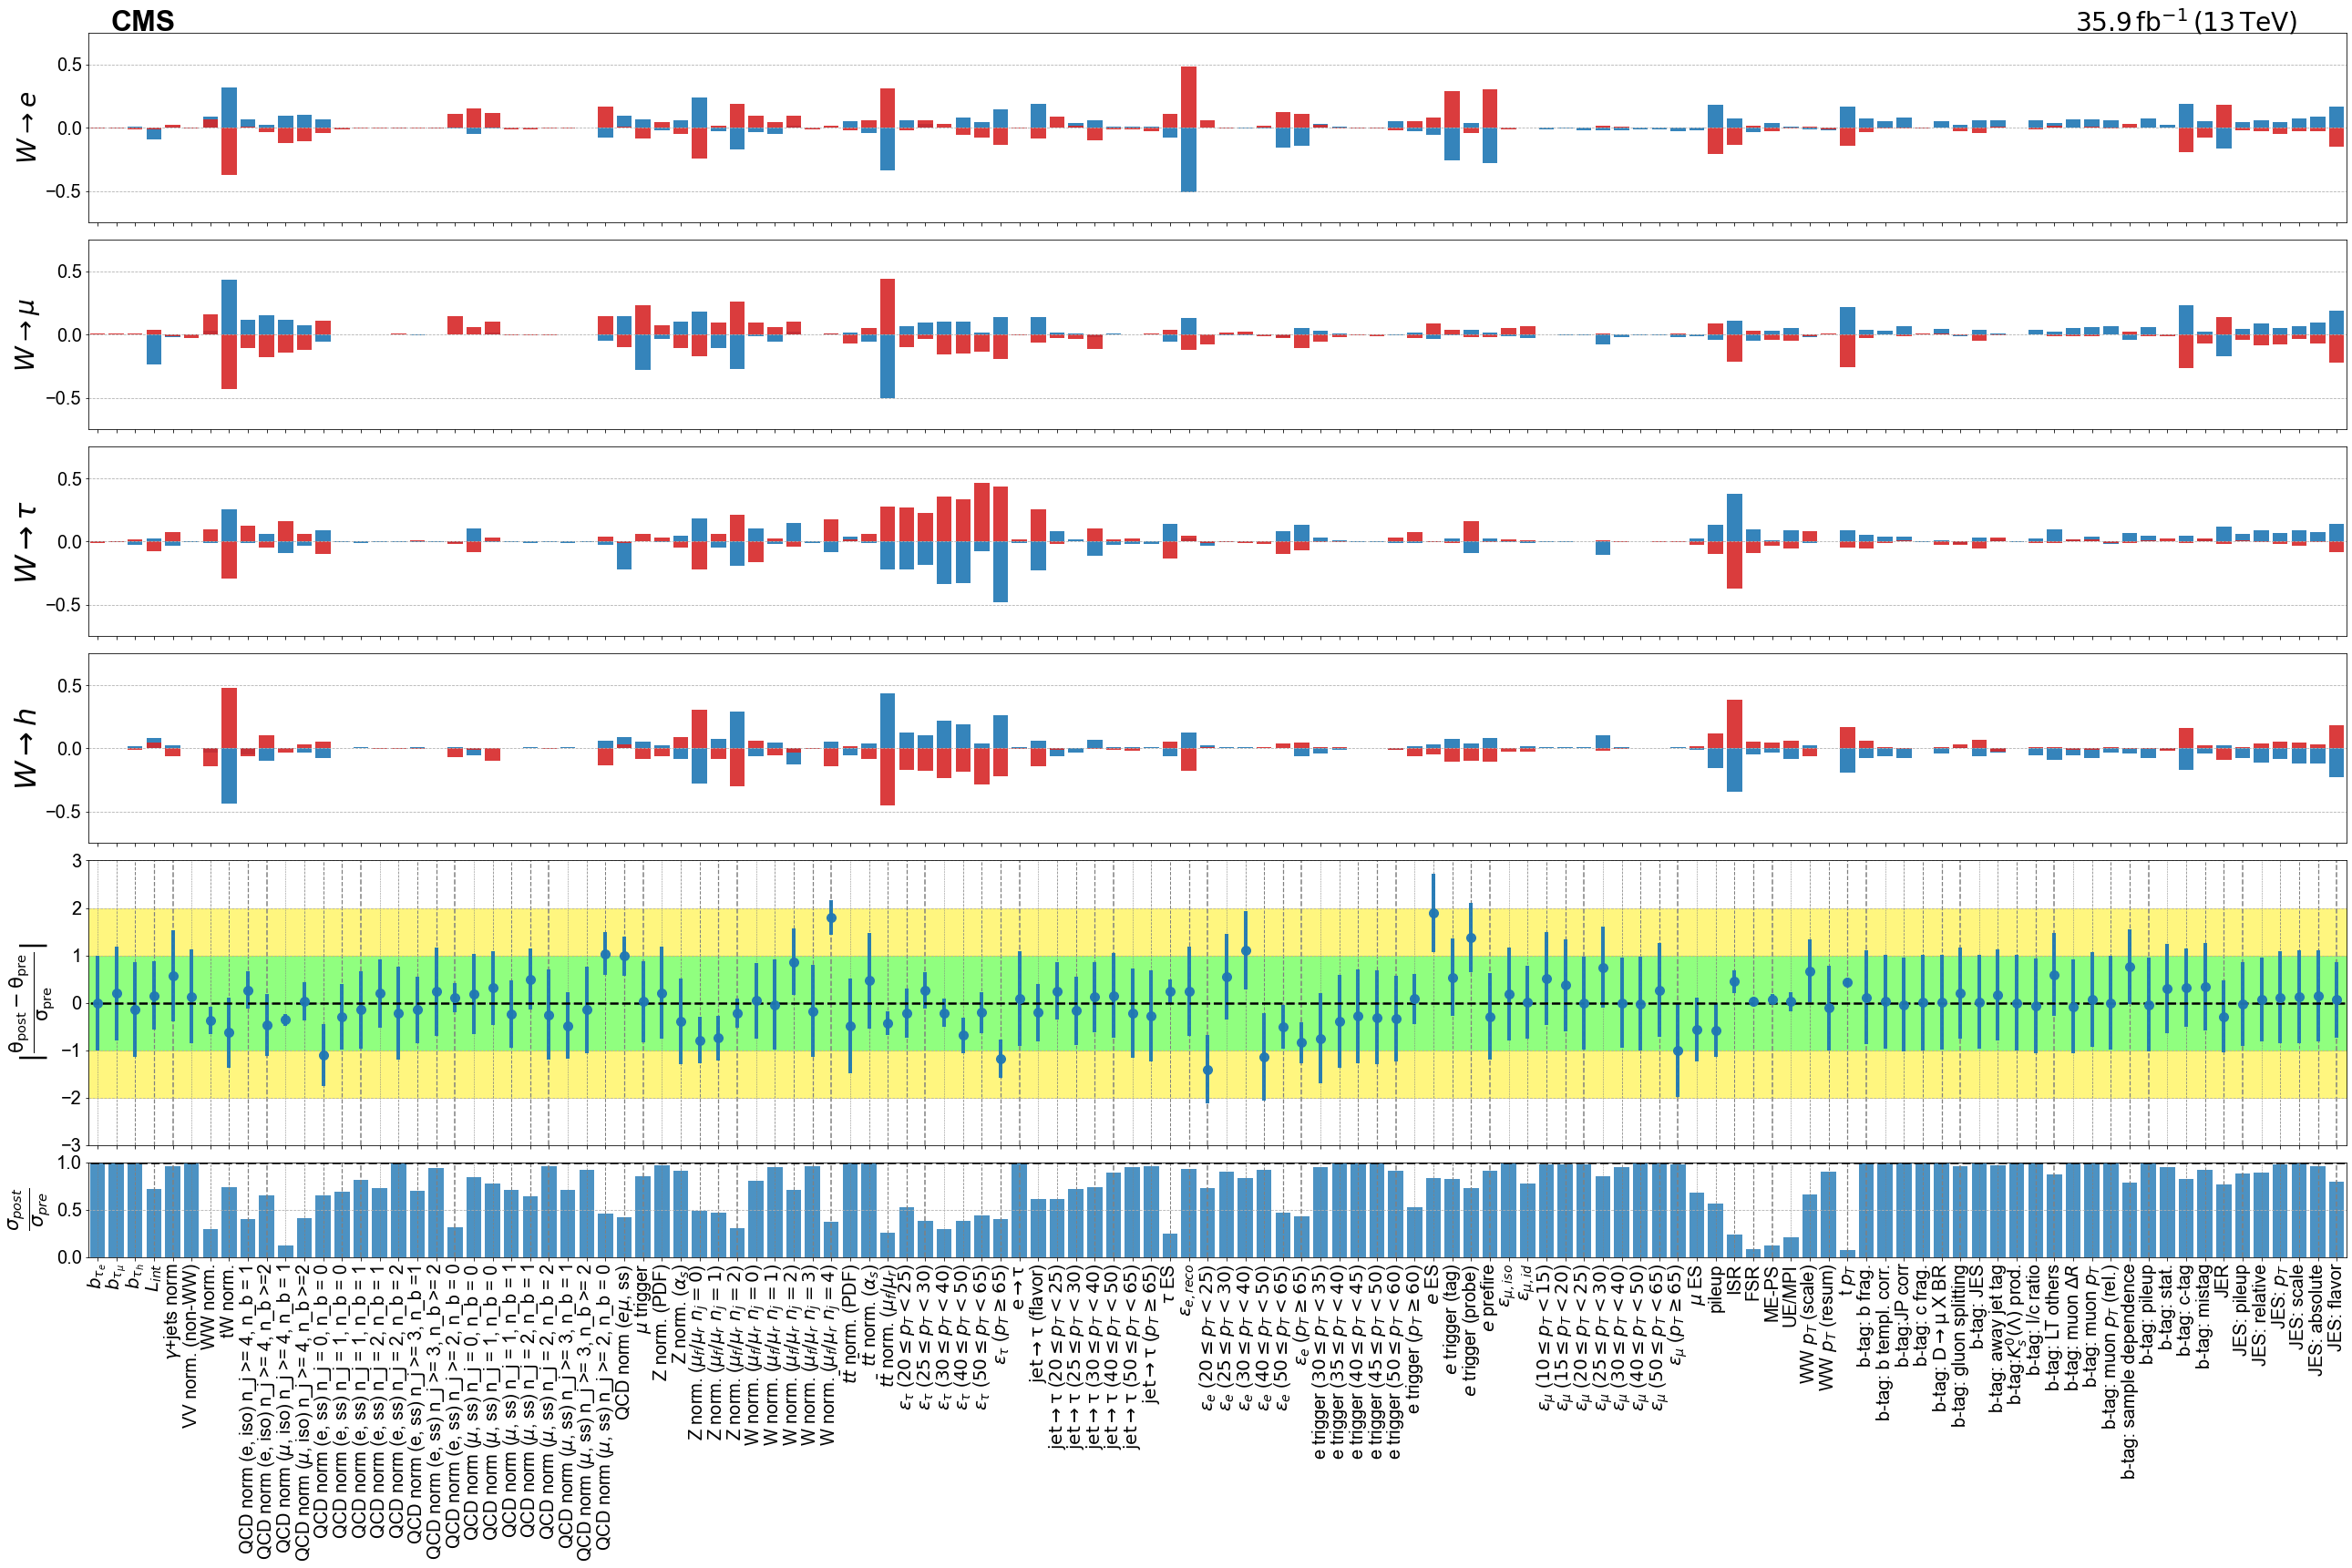

In [3]:
# summary pulls
fig, axes = plt.subplots(6, 1, 
                         figsize=(36, 24), 
                         facecolor='white', 
                         gridspec_kw={'height_ratios':[2, 2, 2, 2, 3, 1]}, 
                         sharex=True)

# get the pulls from the fits to data and the Asimov dataset
params_pre  = param_data['val_init']
stderr_pre  = param_data['err_init']
params_post = param_data['val_fit']
stderr_post = param_data['err_fit']
constraints = param_data['ratio']
pulls = (params_post - params_pre)/stderr_pre
pulls = pulls[4:]

#summary_data_asimov = param_data_asimov[4:].query('active == 1')
#params_pre_asimov  = summary_data_asimov['val_init']
#stderr_pre_asimov  = summary_data_asimov['err_init']
#params_post_asimov = summary_data_asimov['val_fit']
#stderr_post_asimov = summary_data_asimov['err_fit']
#constraints_asimov = summary_data_asimov['ratio']
#pulls_asimov = (params_post_asimov - params_pre_asimov)/stderr_pre_asimov

nparams = len(p_labels)
xticks  = np.arange(1, nparams+1, 1)
impacts = param_impacts.div(stderr_post[:4].values, axis='index')
ymax, ymin = 0.75, -0.75

#plot impacts
ax = axes[0]
ax.bar(xticks, impacts.loc['beta_e', p_labels_up], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts.loc['beta_e', p_labels_down], color = 'C3', alpha = 0.9)
#ax.set_title('impacts')
ax.set_ylabel(r'$W\rightarrow e$', fontsize=28)
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')
ax.text(0.01, 1.01, 'CMS',                                                  
        fontsize=32,
        fontname='Arial',                                                   
        fontweight='bold',                                                  
        transform=ax.transAxes                                              
        )                                                                   
#ax.text(0.04, 1.01, 'Preliminary',                                              
#        fontsize=24,                                                      
#        fontname='Arial',                                                   
#        fontstyle='italic',                                                 
#        transform=ax.transAxes                                              
#        )                                                                   
ax.text(0.88, 1.01,
        r'$\mathsf{{ {0:.1f}\,fb^{{-1}}}}\,(13\,\mathsf{{TeV}})$'.format(35.9),
        fontsize=28,                                                      
        fontname='Arial',                                                   
        transform=ax.transAxes                                              
        )                                                                   


ax = axes[1]
ax.bar(xticks, impacts.loc['beta_mu', p_labels_up], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts.loc['beta_mu', p_labels_down], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \mu$', fontsize=28)
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[2]
ax.bar(xticks, impacts.loc['beta_tau', p_labels_up], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts.loc['beta_tau', p_labels_down], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \tau$', fontsize=32)
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[3]
ax.bar(xticks, impacts.loc['beta_h', p_labels_up], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts.loc['beta_h', p_labels_down], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow h$', fontsize=32)
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

# plot pulls
ax = axes[4]
#rerr_asimov = stderr_post_asimov/stderr_pre_asimov
#ax.errorbar(xticks, np.abs(pulls_asimov), yerr = rerr_asimov, 
#ax.errorbar(xticks, pulls_asimov, yerr = rerr_asimov, 
#            fmt = 'C0o',
#            ecolor = 'C0',
#            capsize = 0.,
#            markersize = 0,
#            elinewidth = 10.,
#            alpha = 0.8,
#            label = 'Asimov data'
#           )
rerr = stderr_post[4:]/stderr_pre[4:]
#ax.errorbar(xticks, np.abs(pulls), yerr = rerr, 
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'C0o',
            ecolor = 'C0',
            capsize = 0.,
            markersize = 10,
            elinewidth = 4.,
            alpha = 0.95,
            label = 'postfit'
           )
#ax.legend()
#ax.fill_between([0, nparams+0.5], [-5, -5], [0, 0], edgecolor='k', facecolor = 'gray', hatch='/', alpha = 1.)

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='k', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = '#22FF00', alpha = 0.5)
ax.fill_between([0, nparams+0.5], [1, 1], [2, 2], color = '#FFEE00', alpha = 0.5)
ax.fill_between([0, nparams+0.5], [-2, -2], [-1, -1], color = '#FFEE00', alpha = 0.5)

ax.set_ylim(-3, 3)
#ax.set_ylim(0, 3)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \left|\frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}\right|$', fontsize=30)
#ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$', fontsize=24)
ax.grid(linestyle='--')
ax.set_xticks(xticks)
for i, gl in enumerate(ax.get_xgridlines()):
    gl.set_color('gray')
    gl.set_linewidth(0.25*(i%5) + 0.5)

ax = axes[5]
ax.bar(xticks, constraints[4:], width=0.8, color='C0', alpha=0.8)
#ax.bar(xticks + 0.2, constraints_asimov, width=0.4, color='C0', alpha=0.8)
ax.plot([0, nparams+1], [1, 1], c='k', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$', fontsize=30)
ax.set_ylim(0, 1)
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--')#, axis='y')
for i, gl in enumerate(ax.get_xgridlines()):
    gl.set_color('gray')
    gl.set_linewidth(0.25*(i%5) + 0.5)

ax.set_xlim(0.5, nparams+0.5)
ax.set_xticks(xticks)
ax.set_xticklabels(param_data.label.values[4:])

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout(h_pad=0)
plt.savefig(f'plots/systematics/pulls_impacts_{scenario}.pdf')
plt.show()